<a href="https://colab.research.google.com/github/gryffindor-guy/Prioritize-vaccine-delivery-using-AI-ML/blob/main/exploratoryDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("district_wisenew (1).csv")
df.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Age above 50,Doctors,Front line workers,people suffering from diseases,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,35000.0,150.0,5645,3455,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
1,0,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,76788.0,200.0,5646,5453,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,1,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,96767.0,345.0,5666,4535,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,2,AP,Andhra Pradesh,AP_Anantapur,Anantapur,67339,143,66599,597,438114.0,932.0,8498,6754,0,0,0,0,0,NaN,NaN
4,3,AP,Andhra Pradesh,AP_Chittoor,Chittoor,86145,332,84972,841,414706.0,922.0,4353,7868,0,0,0,0,0,NaN,NaN


In [ ]:
del df["SlNo"]
del df["Migrated_Other"]
del df["Delta_Confirmed"]
del df['Delta_Deceased']
del df["Delta_Active"]
del df['Delta_Recovered']
del df['District_Notes']
del df["Last_Updated"]


In [ ]:
df.shape

(738, 12)

In [ ]:
df.isna().any()

State_Code                        False
State                             False
District_Key                      False
District                          False
Confirmed                         False
Active                            False
Recovered                         False
Deceased                          False
Age above 50                       True
Doctors                            True
Front line workers                False
people suffering from diseases    False
dtype: bool

In [ ]:
df.isna().sum()

State_Code                        0
State                             0
District_Key                      0
District                          0
Confirmed                         0
Active                            0
Recovered                         0
Deceased                          0
Age above 50                      3
Doctors                           5
Front line workers                0
people suffering from diseases    0
dtype: int64

In [ ]:
df = df.fillna(method='pad')

In [ ]:
df.isna().any()

State_Code                        False
State                             False
District_Key                      False
District                          False
Confirmed                         False
Active                            False
Recovered                         False
Deceased                          False
Age above 50                      False
Doctors                           False
Front line workers                False
people suffering from diseases    False
dtype: bool

In [ ]:
df.fillna(method ='bfill') 

,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Age above 50,Doctors,Front line workers,people suffering from diseases
0,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,35000.0,150.0,5645,3455
1,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,76788.0,200.0,5646,5453
2,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,96767.0,345.0,5666,4535
3,AP,Andhra Pradesh,AP_Anantapur,Anantapur,67339,143,66599,597,438114.0,932.0,8498,6754
4,AP,Andhra Pradesh,AP_Chittoor,Chittoor,86145,332,84972,841,414706.0,922.0,4353,7868
...,...,...,...,...,...,...,...,...,...,...,...,...
733,WB,West Bengal,WB_Purba Bardhaman,Purba Bardhaman,12255,239,11921,95,634545.0,1104.0,8766,7477
734,WB,West Bengal,WB_Purba Medinipur,Purba Medinipur,20086,543,19270,273,664534.0,1096.0,6789,5657
735,WB,West Bengal,WB_Purulia,Purulia,6947,318,6582,47,634534.0,1067.0,7976,7654
736,WB,West Bengal,WB_South 24 Parganas,South 24 Parganas,36009,337,34995,677,634534.0,1058.0,6879,5755


In [ ]:
df.isna().any()

State_Code                        False
State                             False
District_Key                      False
District                          False
Confirmed                         False
Active                            False
Recovered                         False
Deceased                          False
Age above 50                      False
Doctors                           False
Front line workers                False
people suffering from diseases    False
dtype: bool

In [ ]:
df[['Doctors', 'Front line workers','people suffering from diseases']] = df[['Doctors','Front line workers','people suffering from diseases']].fillna(value=0)

In [ ]:
df.isna().any()

State_Code                        False
State                             False
District_Key                      False
District                          False
Confirmed                         False
Active                            False
Recovered                         False
Deceased                          False
Age above 50                      False
Doctors                           False
Front line workers                False
people suffering from diseases    False
dtype: bool

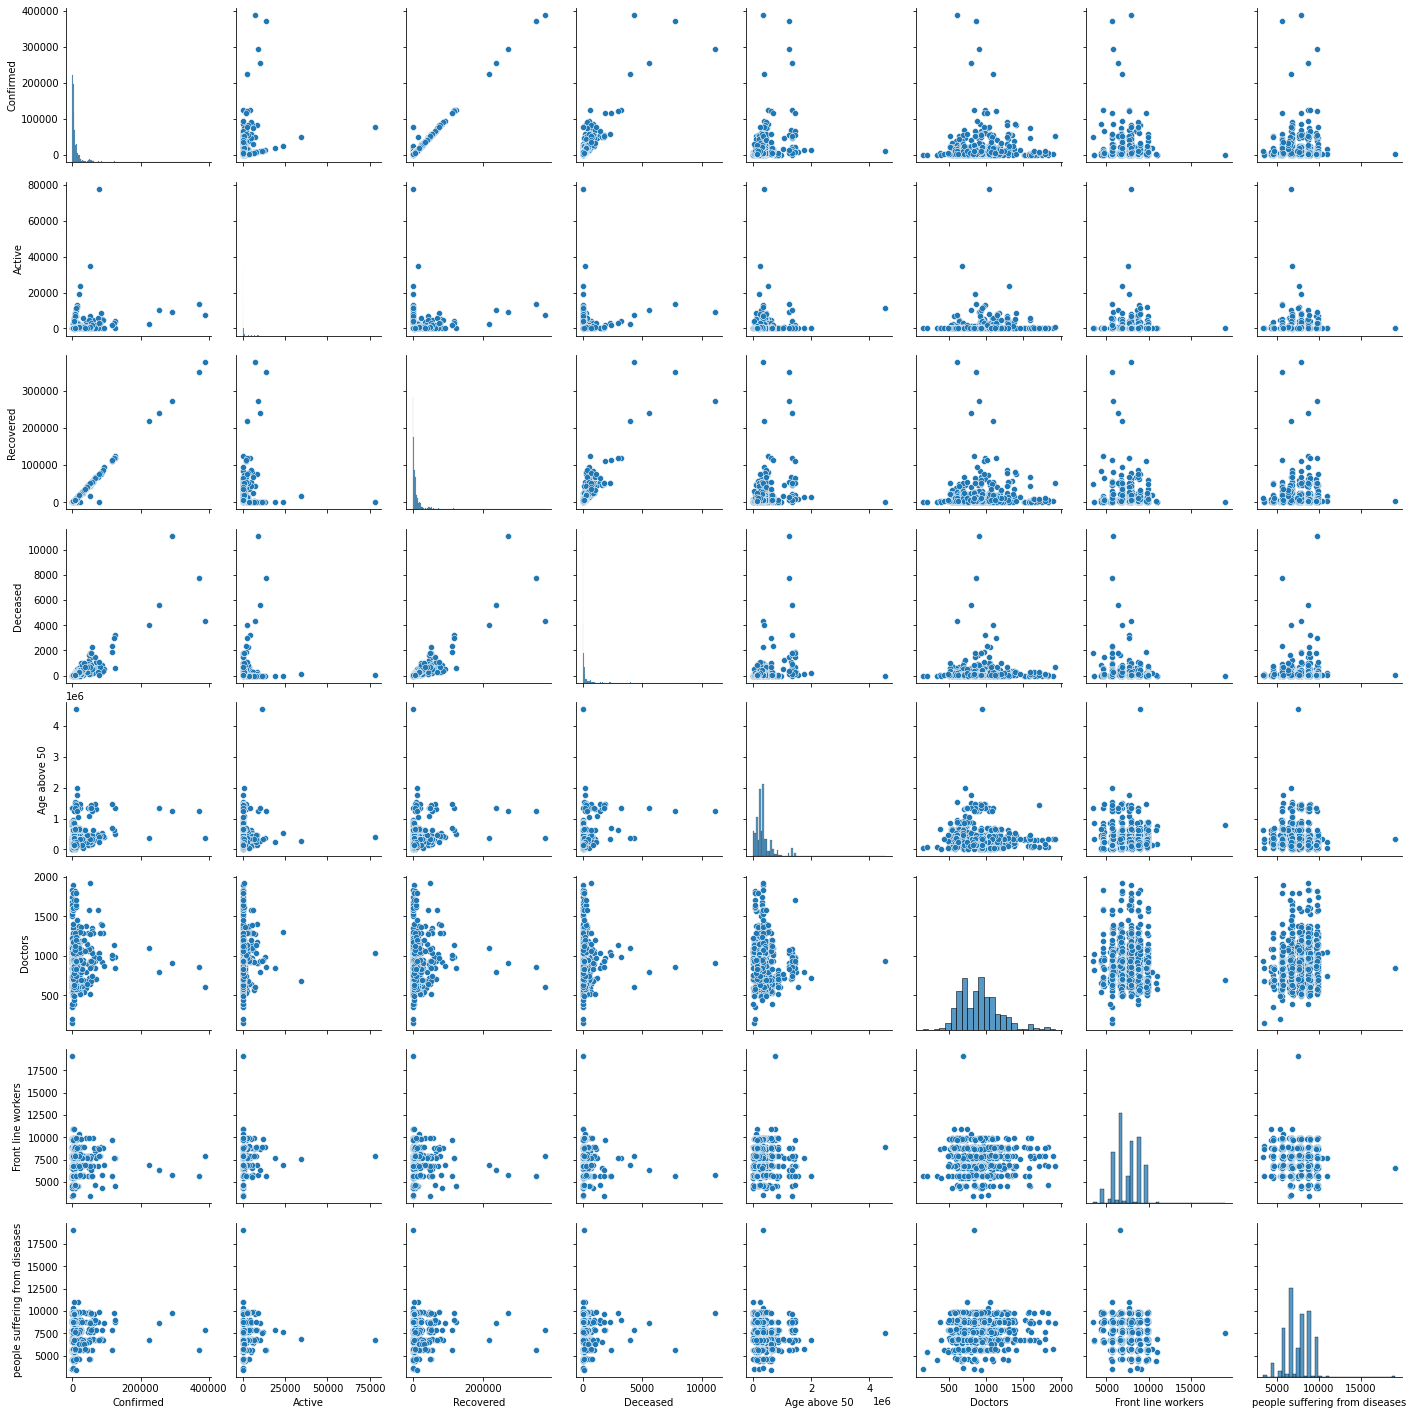

In [ ]:
# performing pair plot which plots scatter plot between given features
sns.pairplot(df)

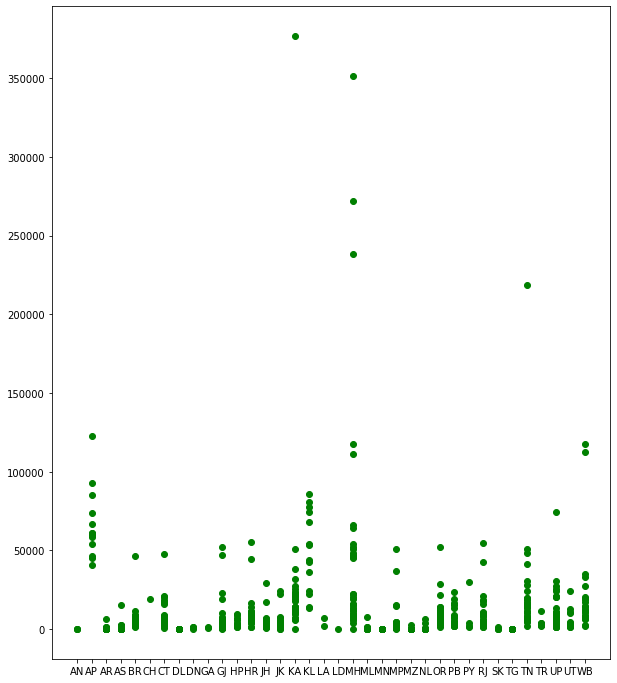

In [ ]:
# performing scatter plot between states and recovered cases
x= df['State_Code']
y= df['Recovered']
plt.scatter(x,y,color='g')

In [ ]:
stateData=pd.read_csv('state_level_latest.csv')

In [ ]:
# installing geopandas for obtaining the india map
!pip install geopandas

In [ ]:
from geopandas import GeoDataFrame, read_file
# reading the shp files for obtaining india map
map_data = read_file('Indian_States.shp')
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


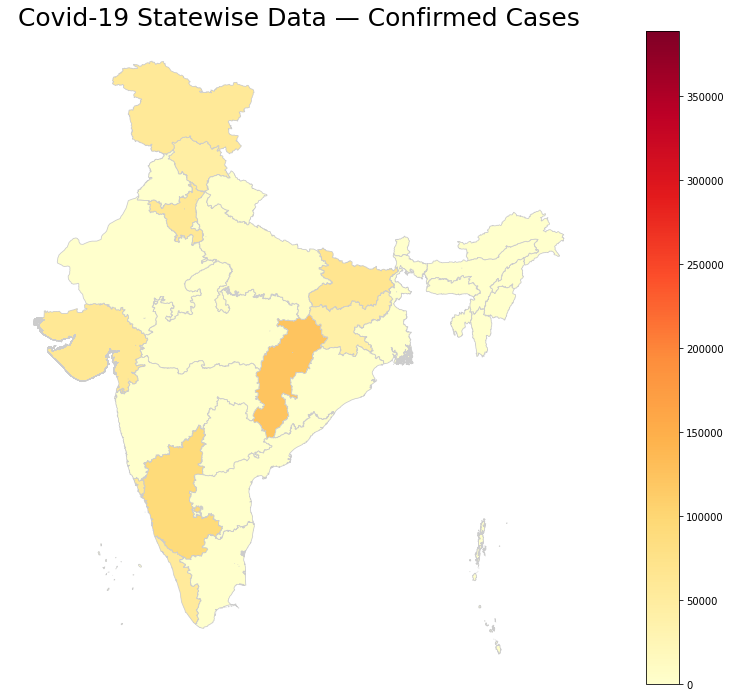

In [ ]:
# plotting the india map along with covid19 confirmed cases density
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")

df = GeoDataFrame(df, geometry= map_data['geometry'] )
ax.set_title("Covid-19 Statewise Data — Confirmed Cases", 
             fontdict =  {"fontsize" : "25", "fontweight" : "3"})
df.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0.8", legend = True)
plt.show()

In [ ]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
India_coord = pd.read_excel('/content/Indian Coordinates (1).xlsx')
India_coord.rename(columns={'Name of State / UT':'State'}, inplace=True) 
India_coord.head()

,State,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [ ]:
state_data = pd.read_csv("/content/state_level_latest.csv")
state_data.drop([36],inplace=True)
state_data.drop(state_data.head(1).index,inplace=True) 
#state_data.set_index('id', inplace=True)
state_data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
1,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
4,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN
5,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...


In [ ]:
df_full = pd.merge(state_data,India_coord,on="State")
df_full.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Latitude,Longitude
0,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...,19.250232,73.160175
1,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...,12.920386,79.150042
2,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...,28.669993,77.230004
3,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN,12.570381,76.919997
4,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...,14.750429,78.570026


In [ ]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')
for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State']):
   folium.CircleMarker([lat, lon], radius=value*0.0001, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>'
   '<strong>Total Cases</strong>: ' + str(value) + '%' ),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

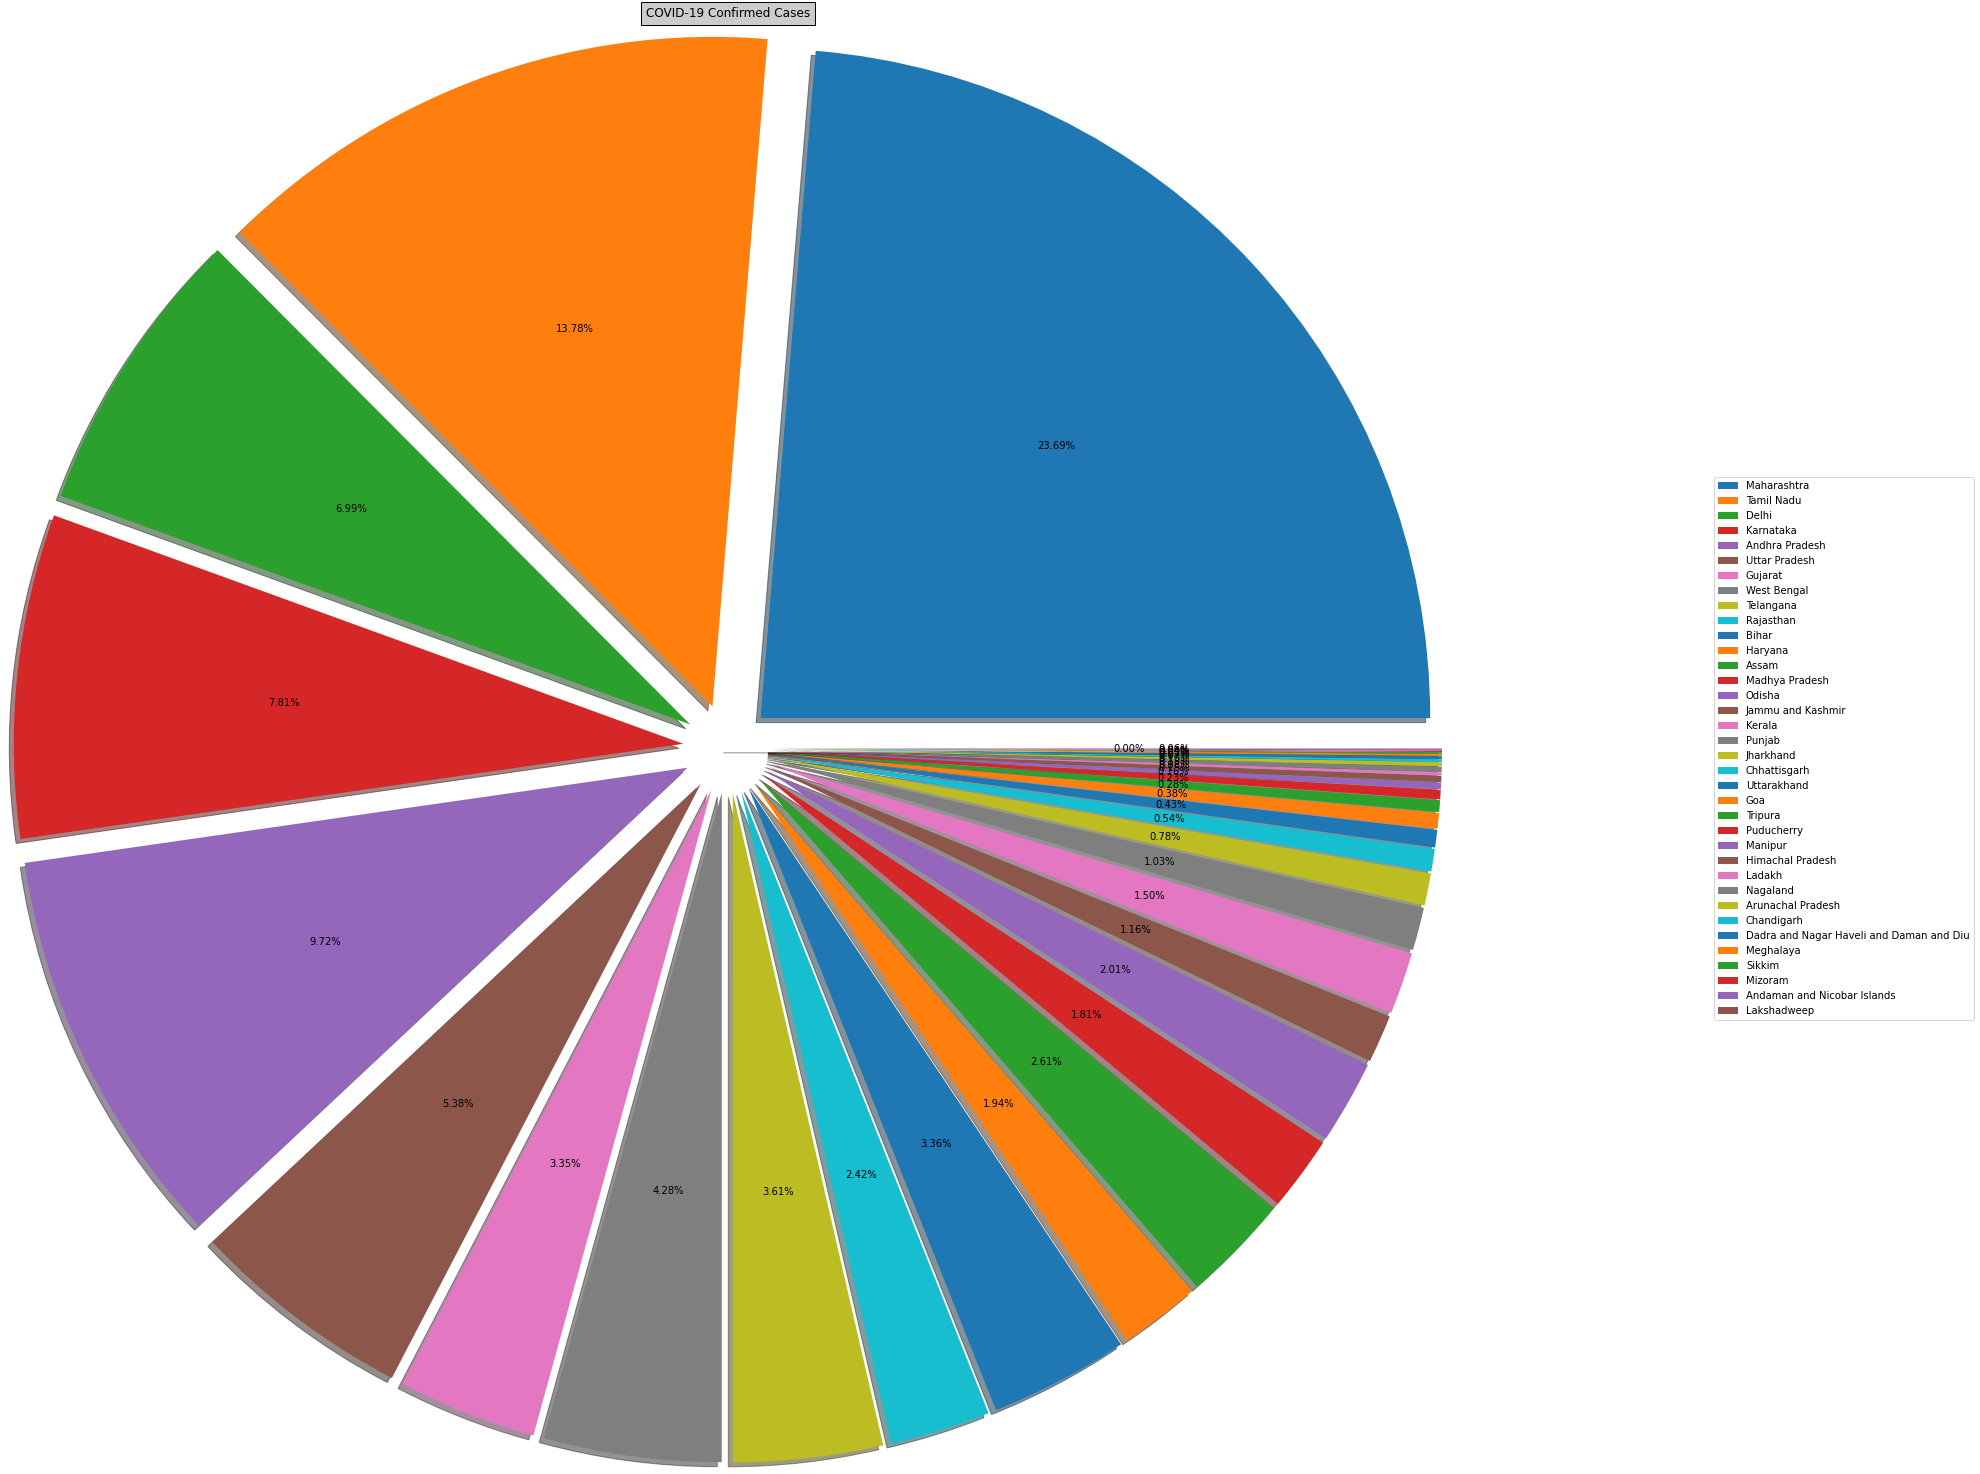

In [ ]:
state = state_data['State']
cases = state_data['Confirmed']
explode = state_data.Confirmed.apply(lambda x:x > 100)
explode = explode.apply(lambda x:0.2 if x == True else 0)
plt.title("COVID-19 Confirmed Cases", bbox={'facecolor':'0.8', 'pad':5}).set_position([.5,1.8])
plt.pie(cases, explode=explode,autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.show()

In [ ]:
# importing plotly package used for building interactive charts
import plotly.express as px

In [ ]:
bar_data = df.groupby(['State'])['Confirmed','Deceased', 'Recovered'].sum().reset_index()

In [ ]:
# plotting the graph between states and deceased cases
fig = px.bar(bar_data, x="State", y="Deceased", color='State', text = 'Deceased', orientation='v', height=600,width=1000,
             title='Deceased Cases')
fig.show()

In [ ]:
# plotting the graph between states and recovered cases
fig = px.bar(bar_data, x="State", y="Recovered", color='State', text = 'Recovered', orientation='v', height=600,width=1000,
             title='Recovered Cases')
fig.show()

In [ ]:
# plot for total number of covid cases in india
fig = px.pie(df, values = 'Confirmed',names='District', height=600,title="CORONA CASES IN INDIA")
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

In [ ]:
# plotting the confirmed,recovered,deceased cases of all the states
line_data = df.groupby('State').sum().reset_index()

line_data = line_data.melt(id_vars='State', 
                 value_vars=['Confirmed', 
                             'Recovered', 
                             'Deceased'], 
                 var_name='Ratio', 
                 value_name='Value')

fig = px.line(line_data, x="State", y="Value", color='Ratio', 
              title='Confirmed cases, Recovered cases, and Deceased')
fig.show()

In [ ]:
bar_data = df.groupby(['State'])['Confirmed','Deceased', 'Recovered'].sum().reset_index()

fig = px.bar(bar_data, x="State", y="Confirmed",color="State", text = 'Confirmed', orientation='v', height=600,width=1000,
             title='CORONA CASES IN INDIA')
fig.show()

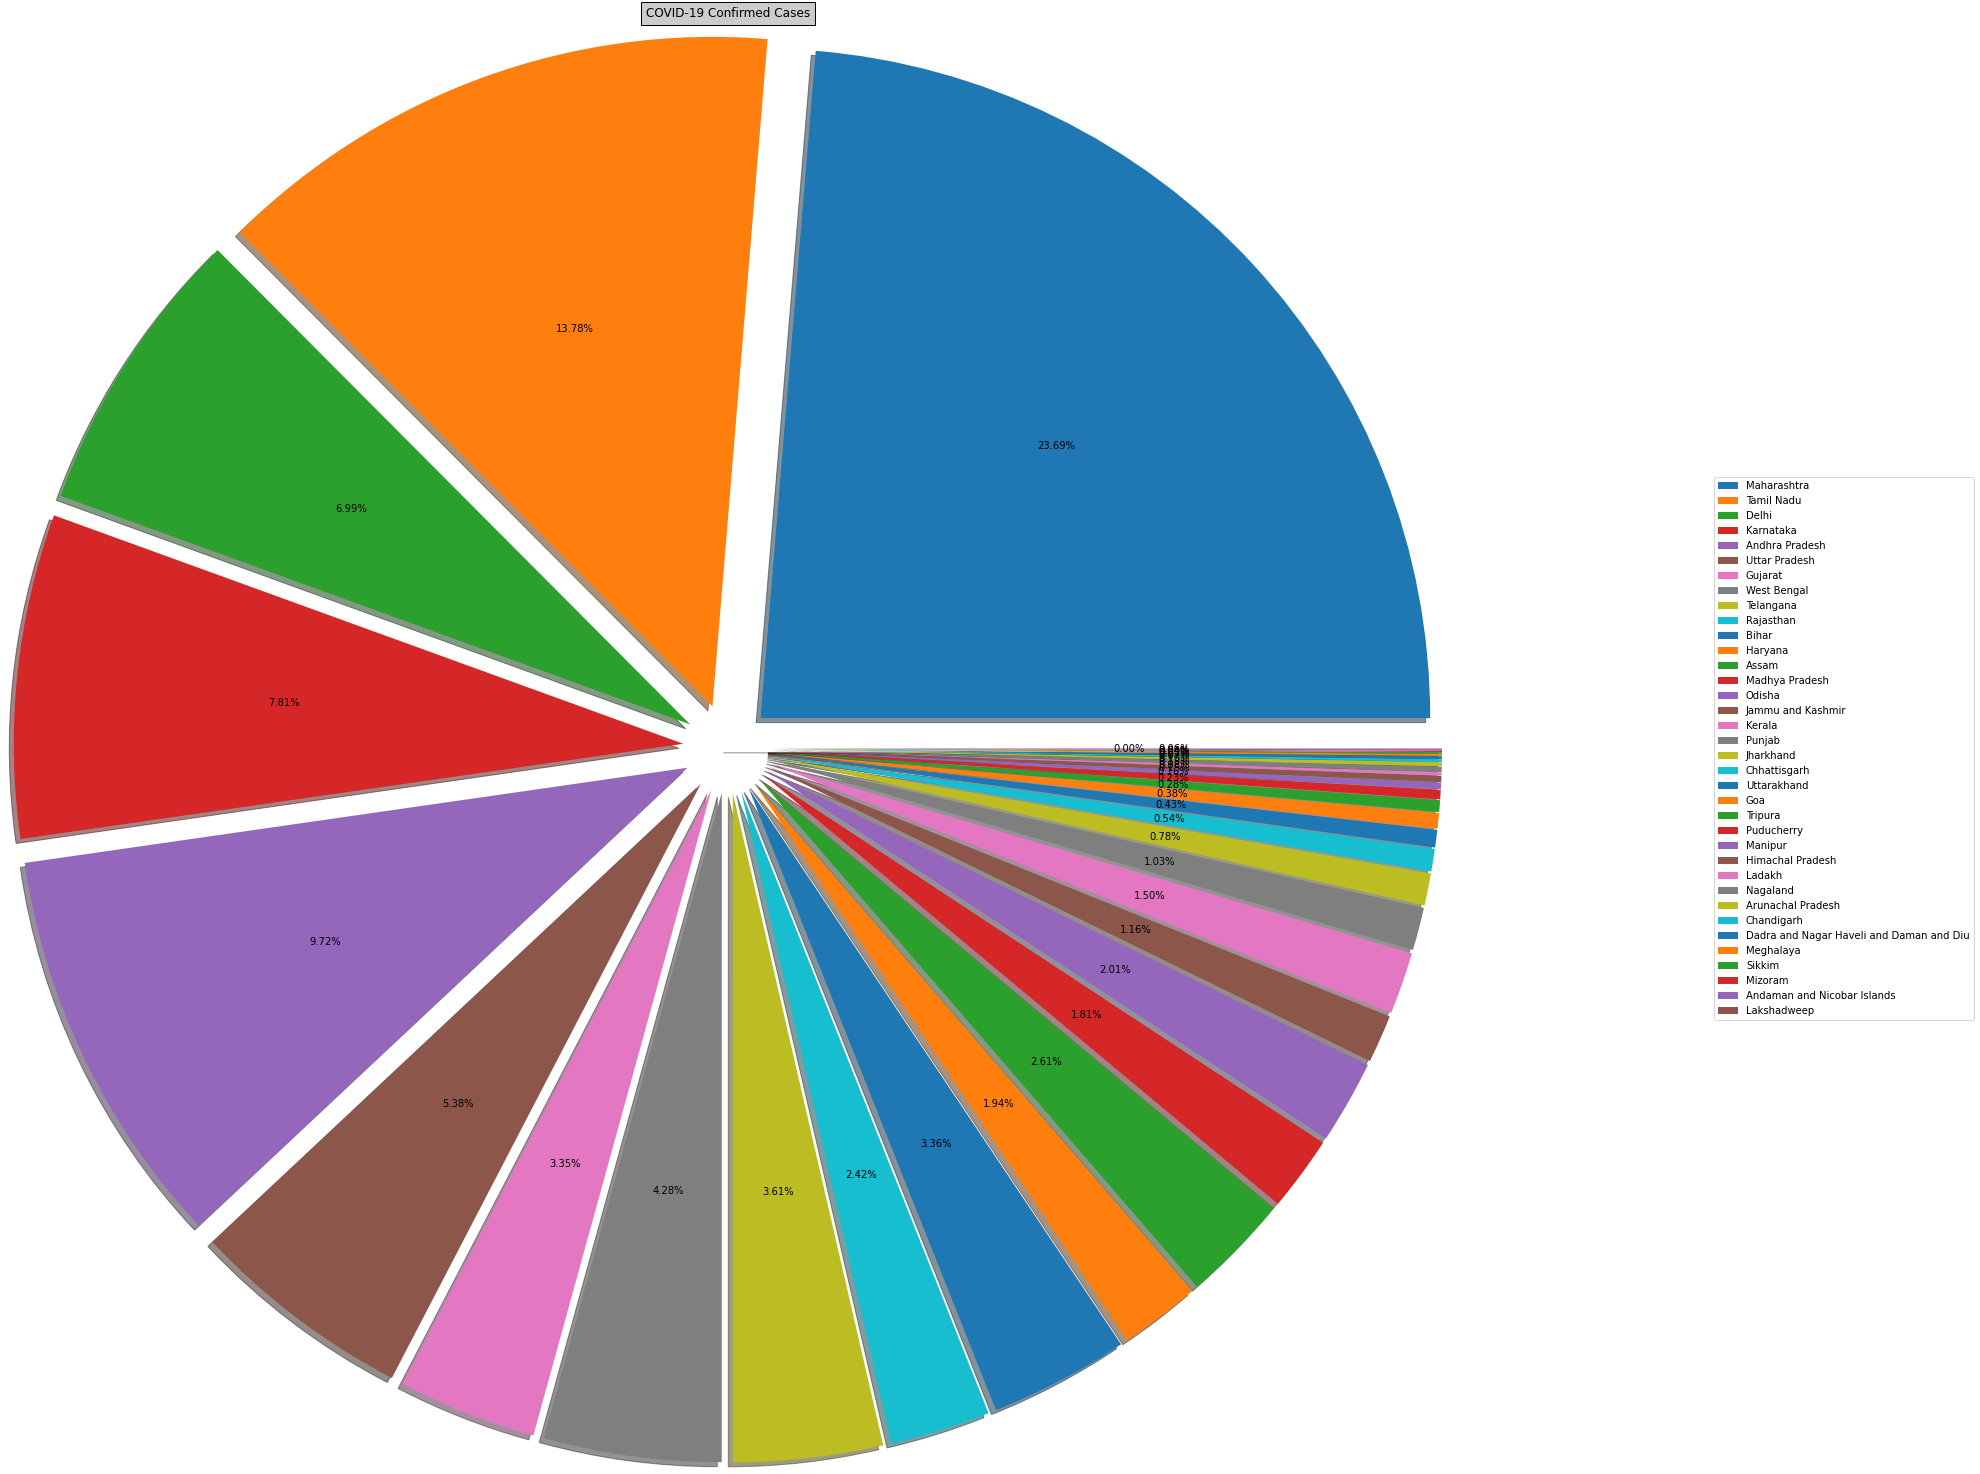

In [ ]:
state = state_data['State']
cases = state_data['Confirmed']
explode = state_data.Confirmed.apply(lambda x:x > 100)
explode = explode.apply(lambda x:0.2 if x == True else 0)
plt.title("COVID-19 Confirmed Cases", bbox={'facecolor':'0.8', 'pad':5}).set_position([.5,1.8])
plt.pie(cases, explode=explode,autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.show()

In [ ]:
states_highest = state_data['Confirmed'].value_counts().head(10)

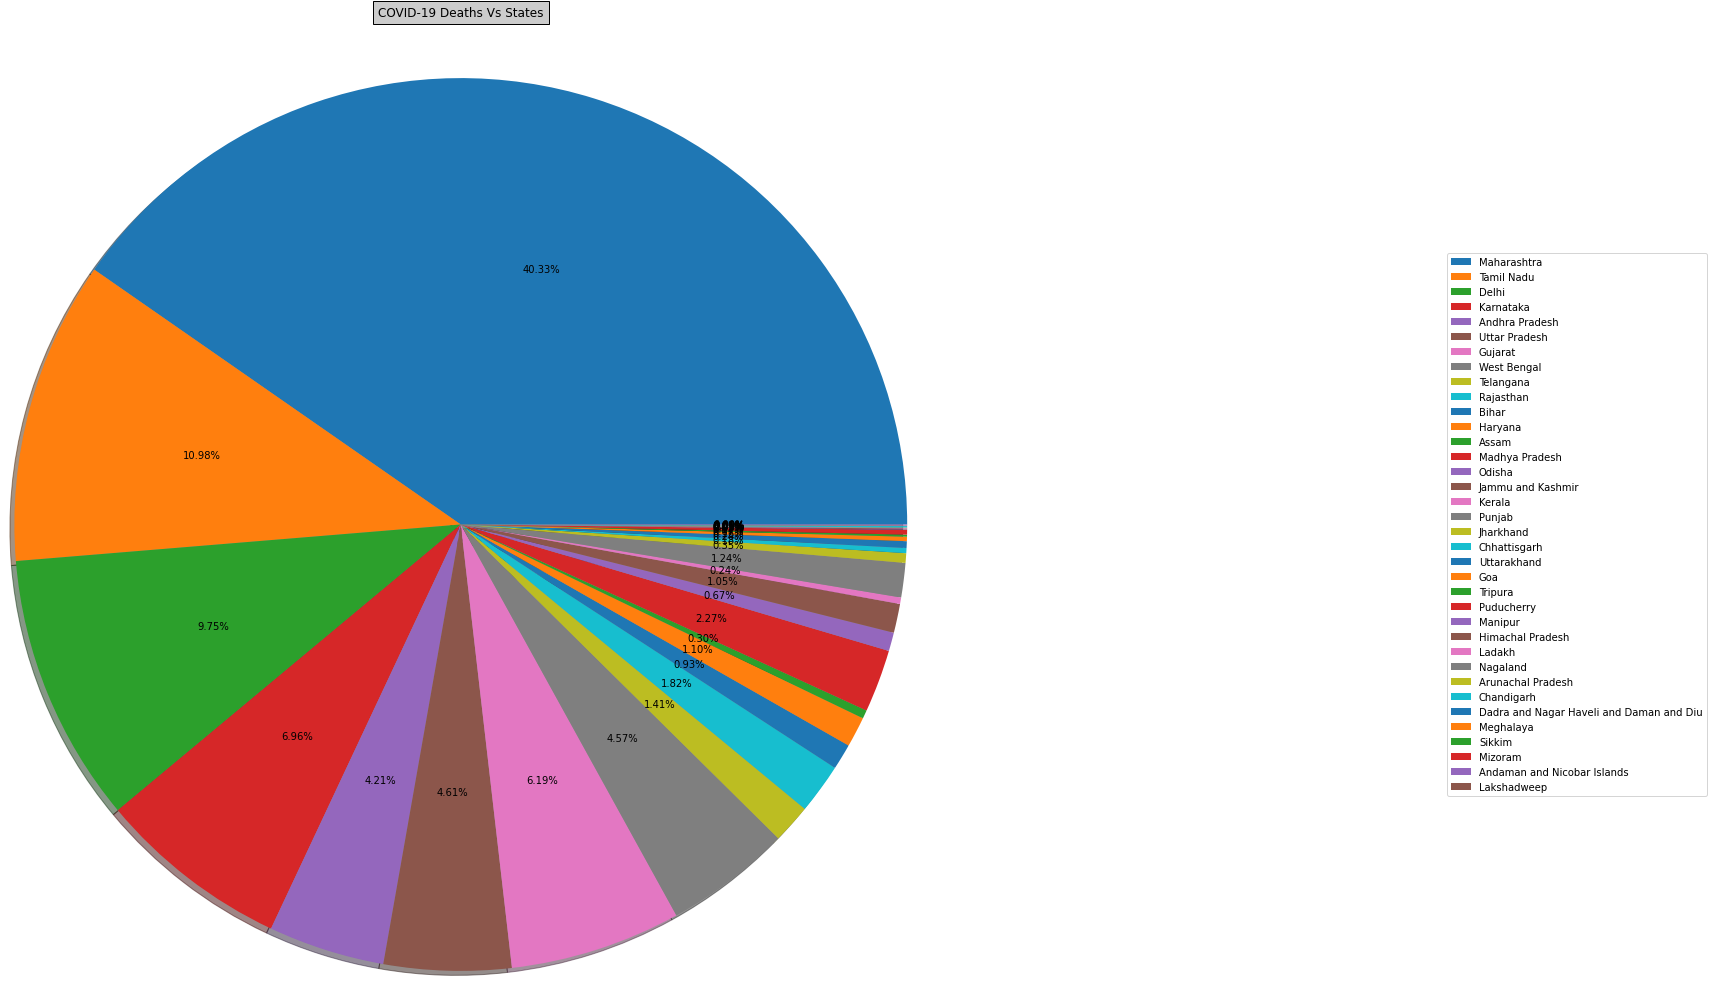

In [ ]:
state = state_data['State']
cases = state_data['Deaths']
explode = state_data.Deaths.apply(lambda x:x > 100)
explode = explode.apply(lambda x:0 if x == True else 0)
plt.title("Covid 19")
plt.pie(cases, explode=explode,autopct='%1.2f%%',shadow=True, radius=2)
plt.legend(state, loc="center",bbox_to_anchor=(2.5, 0.5))
plt.title("COVID-19 Deaths Vs States", bbox={'facecolor':'0.8', 'pad':5}).set_position([.5,1.4])
plt.show()

In [ ]:
# Data types
df.dtypes

State_Code                          object
State                               object
District_Key                        object
District                            object
Confirmed                            int64
Active                               int64
Recovered                            int64
Deceased                             int64
Age above 50                       float64
Doctors                            float64
Front line workers                   int64
people suffering from diseases       int64
geometry                          geometry
dtype: object

Normalizing the data

In [ ]:
# Assuming same lines from your example
cols_to_norm = ['Confirmed','Active','Recovered','Deceased','Age above 50','Doctors','Front line workers','people suffering from diseases']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))


In [ ]:
df.head()

,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Age above 50,Doctors,Front line workers,people suffering from diseases,geometry
0,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0.000000,0.000667,0.000000,0.000000,0.005407,0.000000,0.142602,0.002934,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,0.000003,0.000667,0.000003,0.000000,0.014646,0.028153,0.142666,0.130357,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,0.000131,0.000911,0.000085,0.000000,0.019063,0.109797,0.143941,0.071811,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,AP,Andhra Pradesh,AP_Anantapur,Anantapur,0.173382,0.002501,0.176733,0.053706,0.094534,0.440315,0.324554,0.213329,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,AP,Andhra Pradesh,AP_Chittoor,Chittoor,0.221803,0.004926,0.225489,0.075657,0.089358,0.434685,0.060204,0.284375,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [ ]:
df1 = df[['Confirmed','Active','Recovered','Deceased','Age above 50','Doctors','Front line workers','people suffering from diseases']]
df1.head()

,Confirmed,Active,Recovered,Deceased,Age above 50,Doctors,Front line workers,people suffering from diseases
0,0.000000,0.000667,0.000000,0.000000,0.005407,0.000000,0.142602,0.002934
1,0.000003,0.000667,0.000003,0.000000,0.014646,0.028153,0.142666,0.130357
2,0.000131,0.000911,0.000085,0.000000,0.019063,0.109797,0.143941,0.071811
3,0.173382,0.002501,0.176733,0.053706,0.094534,0.440315,0.324554,0.213329
4,0.221803,0.004926,0.225489,0.075657,0.089358,0.434685,0.060204,0.284375


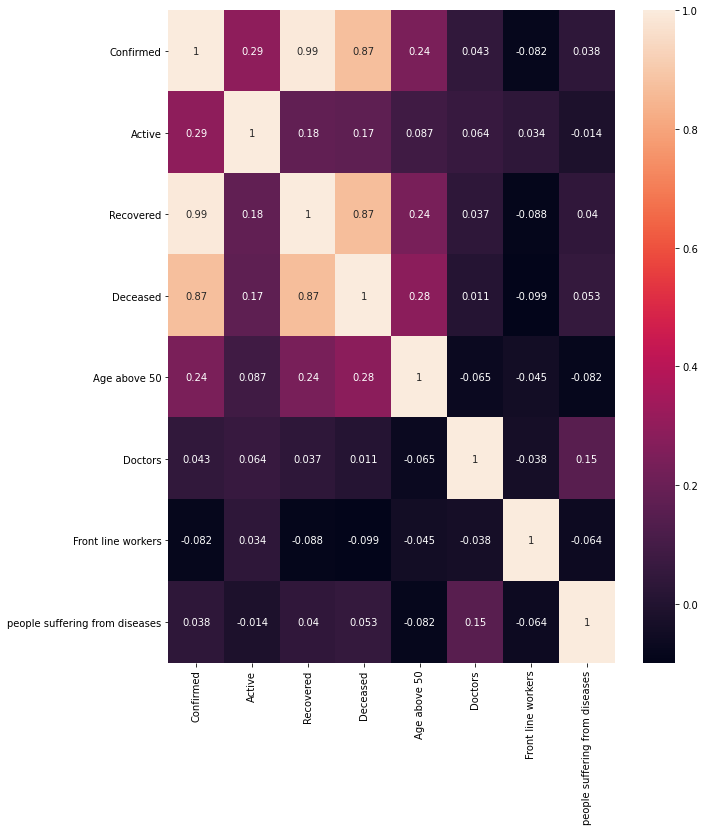

In [ ]:
sns.heatmap(df1.corr(),annot=True)

PCA to the normalized data


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-0.453259,-0.014655
1,-0.405416,-0.010848
2,-0.334961,-0.019457
3,0.022336,0.177535
4,0.048109,0.288557


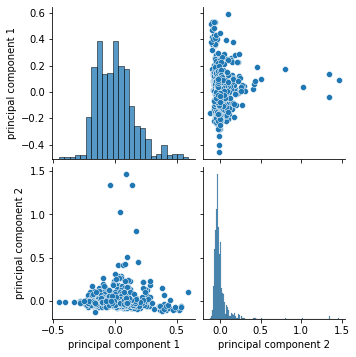

In [ ]:
sns.pairplot(principalDf)

Applying the KMeans model to the data

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(df1)
    k_means.fit(df1)
    distortions.append(sum(np.min(cdist(df1, k_means.cluster_centers_, 'euclidean'), axis=1)) / df1.shape[0])
    #print('Found distortion for {} clusters'.format(k))
print(k)

49


In [ ]:
kmeans_model = KMeans(n_clusters=k, random_state=0)

In [ ]:
#kmeans_model.fit(df1)

In [ ]:
y_predict = kmeans_model.fit_predict(df1)
y_predict

array([38, 38, 38, 25, 46, 46, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 15,
       36, 17, 15, 36, 36, 36, 15, 48, 48, 36, 48, 48, 17, 48, 48, 23, 15,
       48, 48, 36, 48, 36, 36, 36, 40, 18,  8,  6, 29,  8, 40, 40, 40,  6,
       18, 22,  8, 18,  6, 42,  8, 40, 37,  6, 40, 22, 18, 18,  6,  8, 18,
        8,  6,  8, 40, 40, 13, 17, 17, 17, 15, 40, 29, 17, 17, 36, 29, 13,
       18, 36, 40, 15,  6, 17,  8,  8, 17, 17, 29, 29, 15, 36,  1, 18, 15,
       15, 40, 29, 17, 36, 18,  6, 29,  8, 36, 29, 42, 29, 42,  6, 40, 29,
        6, 42, 42, 13, 40, 13, 40,  6, 13,  6, 29, 32, 42, 22,  8,  1, 22,
        6, 42, 22, 13, 22,  6, 18, 11,  7,  7, 47, 47,  7, 34, 34, 34, 47,
       34, 47, 16, 16, 25, 27, 30, 34,  2, 19, 11, 45, 16, 47,  7, 41, 11,
        0, 43, 21,  0, 19,  0, 30, 35, 20, 21, 35, 27, 16, 21, 16, 25, 30,
       35, 43, 43, 20, 20, 20, 11,  7, 47,  7,  7,  7, 47,  7, 47,  7, 11,
       27, 21, 11, 12, 11, 27, 11, 27, 27, 27, 27, 21, 27, 27, 11, 27, 27,
       27, 27, 21, 11, 11

In [ ]:
df['cluster']= y_predict+1
df

,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Age above 50,Doctors,Front line workers,people suffering from diseases,geometry,cluster
0,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0.000000,0.000667,0.000000,0.000000,0.005407,0.000000,0.142602,0.002934,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",39
1,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,0.000003,0.000667,0.000003,0.000000,0.014646,0.028153,0.142666,0.130357,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",39
2,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,0.000131,0.000911,0.000085,0.000000,0.019063,0.109797,0.143941,0.071811,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",39
3,AP,Andhra Pradesh,AP_Anantapur,Anantapur,0.173382,0.002501,0.176733,0.053706,0.094534,0.440315,0.324554,0.213329,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",26
4,AP,Andhra Pradesh,AP_Chittoor,Chittoor,0.221803,0.004926,0.225489,0.075657,0.089358,0.434685,0.060204,0.284375,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,WB,West Bengal,WB_Purba Bardhaman,Purba Bardhaman,0.031554,0.003733,0.031635,0.008546,0.137964,0.537162,0.341645,0.259439,None,36
734,WB,West Bengal,WB_Purba Medinipur,Purba Medinipur,0.051717,0.007633,0.051136,0.024559,0.144595,0.532658,0.215561,0.143367,None,5
735,WB,West Bengal,WB_Purulia,Purulia,0.017887,0.004746,0.017467,0.004228,0.137962,0.516329,0.291263,0.270727,None,36
736,WB,West Bengal,WB_South 24 Parganas,South 24 Parganas,0.092714,0.004990,0.092866,0.060903,0.137962,0.511261,0.221301,0.149617,None,5


Analysing State data

In [ ]:
statedata_new= state_data[['Confirmed','Recovered','Deaths','Active']]
statedata_new.head()

,Confirmed,Recovered,Deaths,Active
1,479779,316375,16792,146305
2,279144,221087,4571,53486
3,141531,127124,4059,10348
4,158254,80281,2897,75067
5,196789,112870,1753,82166


In [ ]:
# Assuming same lines from your example
cols_to_norm = ['Confirmed','Active','Recovered','Deaths']
statedata_new[cols_to_norm] = statedata_new[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
statedata_new.head()

,Confirmed,Recovered,Deaths,Active
1,1.000000,1.000000,1.000000,1.000000
2,0.581818,0.698813,0.272213,0.365579
3,0.294992,0.401814,0.241722,0.070729
4,0.329848,0.253753,0.172523,0.513086
5,0.410166,0.356760,0.104395,0.561608


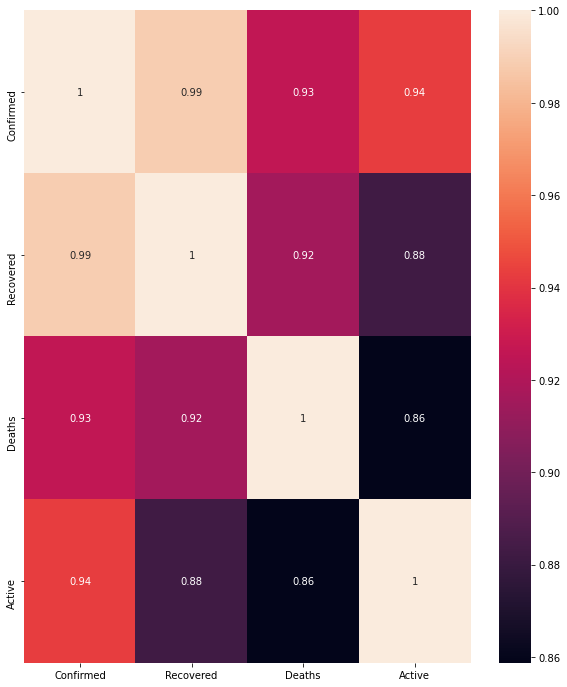

In [ ]:
sns.heatmap(statedata_new.corr(),annot=True)

In [ ]:
kmeans_model = KMeans(n_clusters=5, random_state=0)

In [ ]:
y_predict = kmeans_model.fit_predict(statedata_new)
y_predict

array([1, 2, 4, 3, 3, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
state_data['cluster']= y_predict+1
state_data

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,cluster
1,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...,2
2,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...,3
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...,5
4,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN,4
5,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...,4
6,Uttar Pradesh,108974,63402,1918,43654,06/08/2020 17:53:49,0,UP,0,0,0,NaN,5
7,Gujarat,67811,50524,2579,14708,06/08/2020 21:28:40,0,GJ,0,0,0,NaN,5
8,West Bengal,86754,61023,1902,23829,06/08/2020 21:28:42,0,WB,0,0,0,NaN,5
9,Telangana,73050,52103,589,20358,06/08/2020 11:26:06,0,TG,0,0,0,[July 27]\nTelangana bulletin for the previous...,5
10,Rajasthan,48996,35131,757,13108,06/08/2020 21:54:44,0,RJ,0,0,0,NaN,1


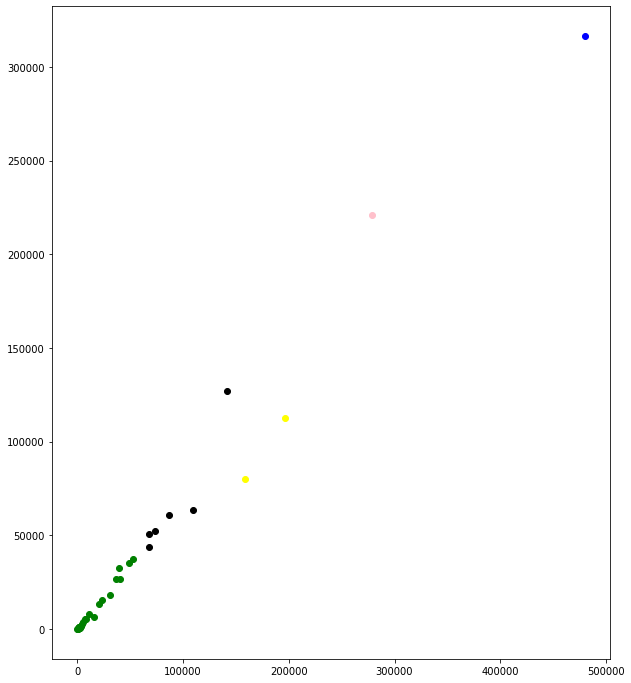

In [ ]:
state_data1 = state_data[state_data.cluster==1]
state_data2 = state_data[state_data.cluster==2]
state_data3 = state_data[state_data.cluster==3]
state_data4 = state_data[state_data.cluster==4]
state_data5 = state_data[state_data.cluster==5]


# ploting the clusters[confrimed vs recovered]
plt.scatter(state_data1['Confirmed'],state_data1['Recovered'],color='green')
plt.scatter(state_data2['Confirmed'],state_data2['Recovered'],color='blue')
plt.scatter(state_data3['Confirmed'],state_data3['Recovered'],color='pink')
plt.scatter(state_data4['Confirmed'],state_data4['Recovered'],color='yellow')
plt.scatter(state_data5['Confirmed'],state_data5['Recovered'],color='black')



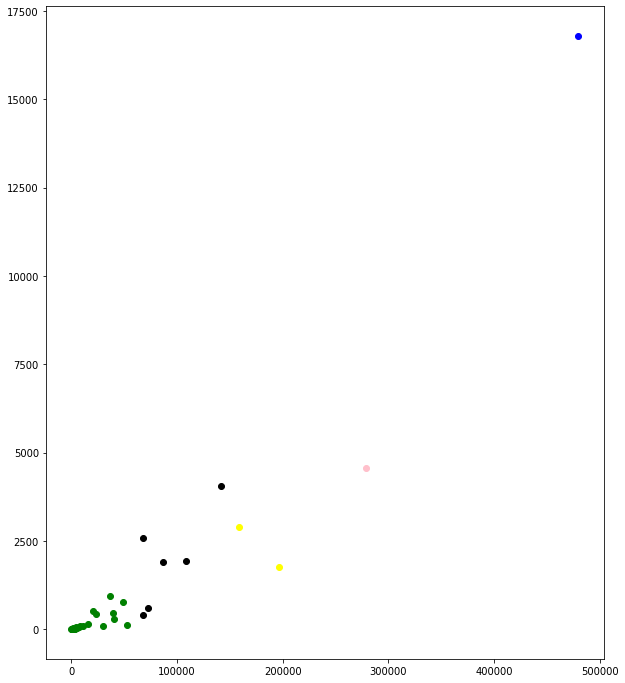

In [ ]:
# ploting the clusters[confrimed vs recovered]
plt.scatter(state_data1['Confirmed'],state_data1['Deaths'],color='green')
plt.scatter(state_data2['Confirmed'],state_data2['Deaths'],color='blue')
plt.scatter(state_data3['Confirmed'],state_data3['Deaths'],color='pink')
plt.scatter(state_data4['Confirmed'],state_data4['Deaths'],color='yellow')
plt.scatter(state_data5['Confirmed'],state_data5['Deaths'],color='black')

In [ ]:
population_data = pd.read_csv('population_india_census2011.csv')
population_data.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [ ]:
population_data.rename(columns={'State / Union Territory':'State'}, inplace=True)

In [ ]:
population_new= population_data[['State','Population']]

In [ ]:
df2 = {'State':'Telangana','Population':35193978} 
population_new = population_new.append(df2, ignore_index = True)
population_new.at[4,'Population']= 84580777

In [ ]:
statewise_data = pd.read_csv('state_level_latest.csv')
statewise_data=pd.merge(statewise_data,population_new,on="State")
statewise_data.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Population
0,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...,112374333
1,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...,72147030
2,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...,16787941
3,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN,61095297
4,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...,49577103


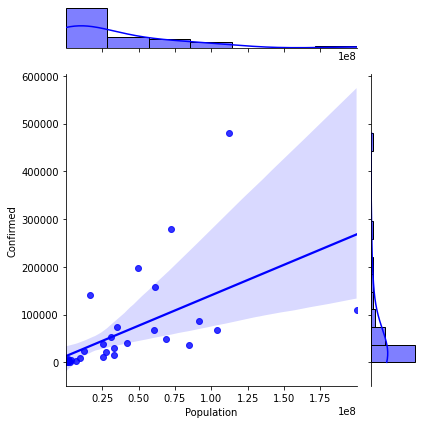

In [ ]:
sns.jointplot(x = 'Population', y = 'Confirmed', data = statewise_data, kind = 'reg', color = 'blue')
plt.ylabel('Total positive cases')
plt.tight_layout()
plt.show()